### **Polynomial Regression (다항 회귀)**

#### **공부 시간에 따른 시험 점수 (우등생)**

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [38]:
dataset = pd.read_csv('PolynomialRegressionData.csv')
X = dataset.iloc[:, :-1].values
Y = dataset.iloc[:,-1].values

### **단순 선형 회귀 (Simple Linear Regression)**

In [39]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X, Y) # 전체 데이터 학습

LinearRegression()

#### **데이터 시각화 (전체)**

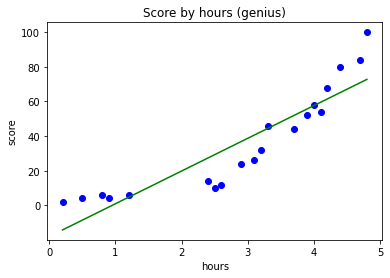

In [40]:
plt.scatter(X,Y,color='blue') # 산점도
plt.plot(X,reg.predict(X),color='green') # 선 그래프
plt.title('Score by hours (genius)') # 제목
plt.xlabel('hours') # X축
plt.ylabel('score') # Y축
plt.show()

In [41]:
reg.score(X,Y) # 전체 데이터를 통한 모델 평가

0.8169296513411765

### **다항 회귀 (Polynomial Regression)**

In [42]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4) # 2차
X_poly = poly_reg.fit_transform(X)
X_poly[:5] # [x] -> [x^0, X^1, x^2] -> x가 3이면 [1, 3, 9]로 변환

array([[1.0000e+00, 2.0000e-01, 4.0000e-02, 8.0000e-03, 1.6000e-03],
       [1.0000e+00, 5.0000e-01, 2.5000e-01, 1.2500e-01, 6.2500e-02],
       [1.0000e+00, 8.0000e-01, 6.4000e-01, 5.1200e-01, 4.0960e-01],
       [1.0000e+00, 9.0000e-01, 8.1000e-01, 7.2900e-01, 6.5610e-01],
       [1.0000e+00, 1.2000e+00, 1.4400e+00, 1.7280e+00, 2.0736e+00]])

In [43]:
poly_reg.get_feature_names_out()

array(['1', 'x0', 'x0^2', 'x0^3', 'x0^4'], dtype=object)

In [44]:
X[:5]

array([[0.2],
       [0.5],
       [0.8],
       [0.9],
       [1.2]])

In [45]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, Y)  # 변환된 X와 Y를 가지고 모델 생성 (학습)

LinearRegression()

#### **데이터 시각화 (변환된 X와 Y)**

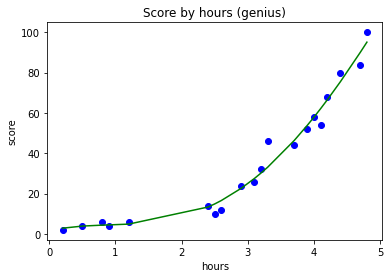

In [46]:
plt.scatter(X,Y,color='blue')
plt.plot(X,lin_reg.predict(poly_reg.fit_transform(X)),color='green')
plt.title('Score by hours (genius)')
plt.xlabel('hours') 
plt.ylabel('score')
plt.show()

In [47]:
X_range = np.arange(min(X),max(X),0.1) # X의 최솟값에서 최댓값까지의 범위를 0.1 단위로 잘라 데이터 생성
X_range 

array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4,
       1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7,
       2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. ,
       4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7])

In [48]:
X_range.shape

(46,)

In [49]:
X[:5]

array([[0.2],
       [0.5],
       [0.8],
       [0.9],
       [1.2]])

In [50]:
X_range = X_range.reshape(-1,1) # 행 계수는 자동으로 계산, 열 계수는 1개
X_range.shape

(46, 1)

In [51]:
X_range[:5]

array([[0.2],
       [0.3],
       [0.4],
       [0.5],
       [0.6]])

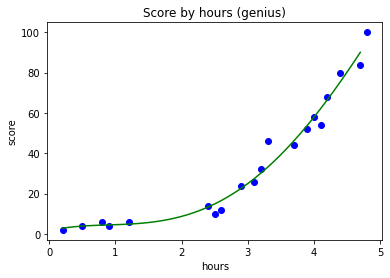

In [52]:
plt.scatter(X, Y, color='blue')
plt.plot(X_range, lin_reg.predict(poly_reg.fit_transform(X_range)), color='green')
plt.title('Score by hours (genius)')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

#### **공부 시간에 따른 성적 예측**

In [53]:
reg.predict([[2]]) # 2시간을 공부했을 때 선형 회귀 모델의 예측

array([19.85348988])

In [54]:
lin_reg.predict(poly_reg.fit_transform([[2]])) # 2시간을 공부했을 때 다항 회귀 모델의 예측

array([8.70559135])

In [55]:
lin_reg.score(X_poly, Y)

0.9782775579000045